**Building Complex Models by using Functional API**

Explicit Input Layer

In [1]:
import tensorflow as tf
from tensorflow import keras

Import X,y and train, test, validation set

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load from Excel (offline)
housing = pd.read_excel("/content/fetch_california_housing.xlsx")

housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [4]:
y = housing['target']
X = housing.drop(columns='target', axis=1)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

Model

In [11]:
input = keras.layers.Input(shape=X_train_scaled.shape[1:])

hidden1 = keras.layers.Dense(30, activation="relu")(input)

hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.Concatenate()([input, hidden2])

output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [12]:
input_A = keras.layers.Input(shape=[5]) # for simple model

# deep dive into NN
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [14]:
model.compile(loss="mse", optimizer="sgd") # compile model with loss function

X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]

X_new_A, X_new_B = X_test_A[:3], X_test_B[:3] # Test on 3 values

**Why do we divide train_set into X_train_A and X_train_B?**

Because we have two input branches: one for simple linear and one for deep dive into neural networks.

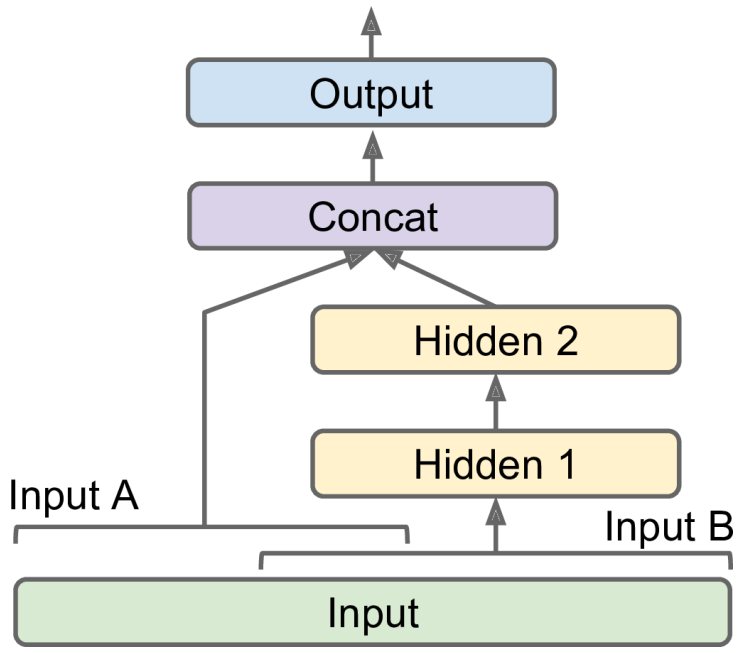

In [15]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.5521 - val_loss: 0.5797
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0522 - val_loss: 0.5627
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5415 - val_loss: 0.5116
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5992 - val_loss: 0.4678
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5084 - val_loss: 0.3965
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4627 - val_loss: 0.3740
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4214 - val_loss: 0.3730
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4105 - val_loss: 0.3630
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3956 - val_loss: 0.3782
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3925 - val_loss: 0.3512
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3956 - val_loss: 0.3457
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [16]:
y_pred # Predict with 3 data points

array([[0.9798541],
       [1.2168467],
       [0.6944815]], dtype=float32)

# Handling Multiple Outputs – Auxiliary Output for Regularization

Adding extra outputs is quite easy: just connect them to the appropriate layers and add them to your model’s list of outputs.

In [17]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
 outputs=[output, aux_output])

In [18]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [19]:
history = model.fit(
 [X_train_A, X_train_B], [y_train, y_train], epochs=20,
 validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - dense_14_loss: 1.6315 - dense_15_loss: 2.9539 - loss: 1.7637 - val_dense_14_loss: 0.5504 - val_dense_15_loss: 1.0348 - val_loss: 0.5989
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_14_loss: 0.6493 - dense_15_loss: 1.0951 - loss: 0.6939 - val_dense_14_loss: 0.4656 - val_dense_15_loss: 0.8761 - val_loss: 0.5068
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_14_loss: 0.7164 - dense_15_loss: 1.0736 - loss: 0.7521 - val_dense_14_loss: 0.4393 - val_dense_15_loss: 0.8090 - val_loss: 0.4764
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_14_loss: 0.4942 - dense_15_loss: 0.7892 - loss: 0.5237 - val_dense_14_loss: 0.4582 - val_dense_15_loss: 0.9226 - val_loss: 0.5048
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - dense_14_loss: 0.9155 - dense_15_loss: 1.7326 - loss: 0.9972 - val_dense_14_loss: 0.3938 - val_dense_15_loss: 0.6914 - val_loss: 0.4236
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

In [23]:
total_loss, main_loss, aux_loss = model.evaluate(
 [X_test_A, X_test_B], [y_test, y_test])
print('\n')
print(total_loss)
print(main_loss)
print(aux_loss)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_14_loss: 0.3052 - dense_15_loss: 0.5226 - loss: 0.3269


0.3537576496601105
0.33486977219581604
0.5415796637535095


In [24]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


In [25]:
y_pred_main

array([[1.1155784],
       [1.3606682],
       [0.9243891]], dtype=float32)